# ***Highest Hollywood Grossing Movies***
----
This nootebook aims to answer the following questions based on the dataset ***highest holywood grossing movies***:
1. [***What is the highest-grossing film of all time? What was the gross in dollars ($)?***](#what-is-the-highest-grossing-film-of-all-time-what-was-the-gross-in-dollars)
2. [***What is the average runtime of Warner Bros.’s movies?***](#what-is-the-average-runtime-of-warner-bross-movies)
3. [***If you were a great executive responsible for approving projects, which genre would you choose to maximize the most your profit?***](#if-you-were-a-great-executive-responsible-for-approving-projects-which-genre-would-you-choose-to-maximize-the-most-your-profit)

In [159]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('highest_holywood_grossing_movies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


## ***What is the highest-grossing film of all time? What was the gross in dollars ($)?***
----

In [160]:
def currency(currency: float):
    formatted_float = "${:,.2f}".format(currency)
    return formatted_float

In [161]:
sort_by_grossing = data.sort_values(['World Sales (in $)'],ascending=False)
sort_by_grossing['World Sales (in $)'] = pd.to_numeric(sort_by_grossing['World Sales (in $)'])
sort_by_grossing['Domestic Sales (in $)'] = pd.to_numeric(sort_by_grossing['Domestic Sales (in $)'])
sort_by_grossing['International Sales (in $)'] = pd.to_numeric(sort_by_grossing['International Sales (in $)'])

sort_by_grossing['Domestic Sales (in $)'] = sort_by_grossing['Domestic Sales (in $)'].apply(currency)
sort_by_grossing['International Sales (in $)'] = sort_by_grossing['International Sales (in $)'].apply(currency)
sort_by_grossing['World Sales (in $)'] = sort_by_grossing['World Sales (in $)'].apply(currency)

sort_by_grossing[['Title', 'Domestic Sales (in $)','International Sales (in $)','World Sales (in $)']].head(3)

,Title,Domestic Sales (in $),International Sales (in $),World Sales (in $)
2,Avatar (2009),"$760,507,625.00","$2,086,738,578.00","$2,847,246,203.00"
1,Avengers: Endgame (2019),"$858,373,000.00","$1,939,128,328.00","$2,797,501,328.00"
6,Titanic (1997),"$659,363,944.00","$1,542,283,320.00","$2,201,647,264.00"


## ***What is the average runtime of Warner Bros.’s movies?***
----

In [162]:
#data treatment -> total minutes
def time_conv(time: str):
    # Convert runtimes to minute
    time = time.split(' ')
    length = len(time)

    if length == 4:
        hour, minute = int(time[0]), int(time[2])
        return hour*60 + minute
    elif length == 2:
        minute = int(time[0])
        return minute*60

In [163]:
#Converting string runtime into minutes
data["Movie Runtime"] = data["Movie Runtime"].apply(time_conv)
data[['Title','Distributor','Movie Runtime']].head(3)

,Title,Distributor,Movie Runtime
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,138
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,181
2,Avatar (2009),Twentieth Century Fox,162


In [164]:
#Counting warner bros movies 
warner_bros_movies = data[data['Distributor']=="Warner Bros."]
print("Total movies:\n")
print(warner_bros_movies["Distributor"].count())
total_movies = warner_bros_movies["Distributor"].count()

Total movies:

158


In [165]:
#Sum duration time in minutes from warner bros movies
total_duration_minutes = warner_bros_movies["Movie Runtime"].sum()
print("Total time(in minutes):\n")
print(total_duration_minutes)

Total time(in minutes):

19360


In [166]:
#Calculating average time in minutes
time_average = total_duration_minutes/total_movies
#print(time_average)
hours = time_average//60
minutes = time_average % 60
# seconds = time_average * 60

print("Warner Bros.'s movies average time:\n")
print("%d Hours %02d minutes" % (hours, minutes))

Warner Bros.'s movies average time:

2 Hours 02 minutes


## ***If you were a great executive responsible for approving projects, which genre would you choose to maximize the most your profit?***
----

In [167]:
gb_genre = data.groupby('Genre')

In [168]:
most_sales_genre = gb_genre.sum().sort_values('World Sales (in $)', ascending=False)[:10]

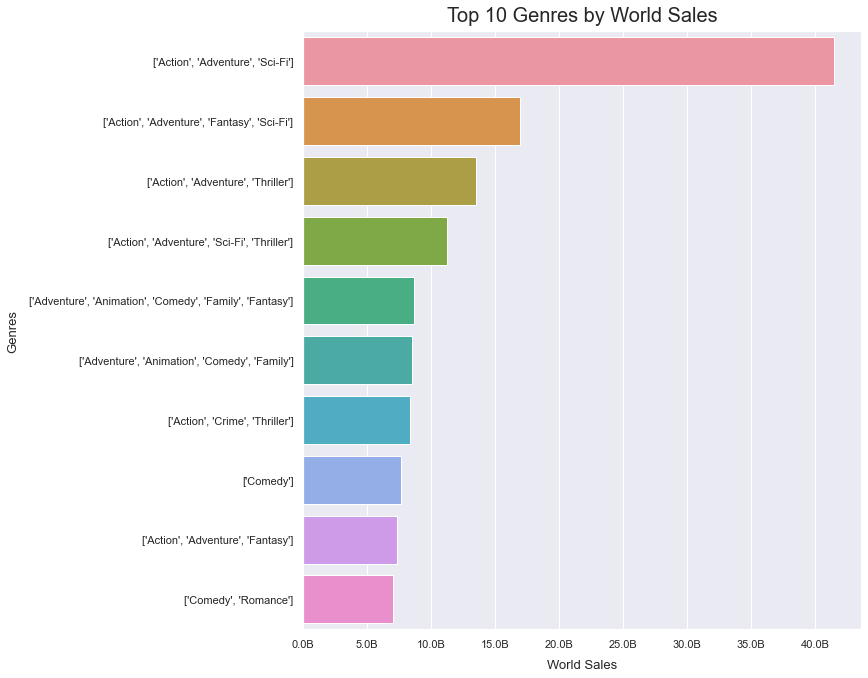

In [169]:
fig, ax = plt.subplots(figsize=(10, 11))

sns.set_theme(palette='Set2')
sns.barplot(ax=ax, x=most_sales_genre['World Sales (in $)'], y=most_sales_genre.index)

ax.set_title('Top 10 Genres by World Sales', fontsize=20, pad=10)
ax.set_xlabel('World Sales', fontdict={'fontsize': 13}, labelpad=10)
ax.set_ylabel('Genres', fontdict={'fontsize': 13}, labelpad=10)
ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x)/1_000_000_000}B')

plt.show()